In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [6]:
fair_probs = torch.ones(6) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [7]:
multinomial.Multinomial(100, fair_probs).sample()

tensor([10., 17., 19., 18., 18., 18.])

In [8]:
multinomial.Multinomial(10000, fair_probs).sample() / 1000

tensor([1.6630, 1.6990, 1.6650, 1.6680, 1.6280, 1.6770])

In [ ]:
test = torch.tensor([1, 1, 1, 1, 1, 2])   # 自动权重归一化
multinomial.Multinomial(100, test).sample()

tensor([17.,  9., 16., 13., 12., 33.])

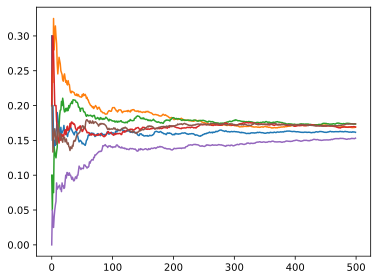

In [16]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimate = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimate[:, i].numpy(), label=("P(" + str(i + 1) + ")"))